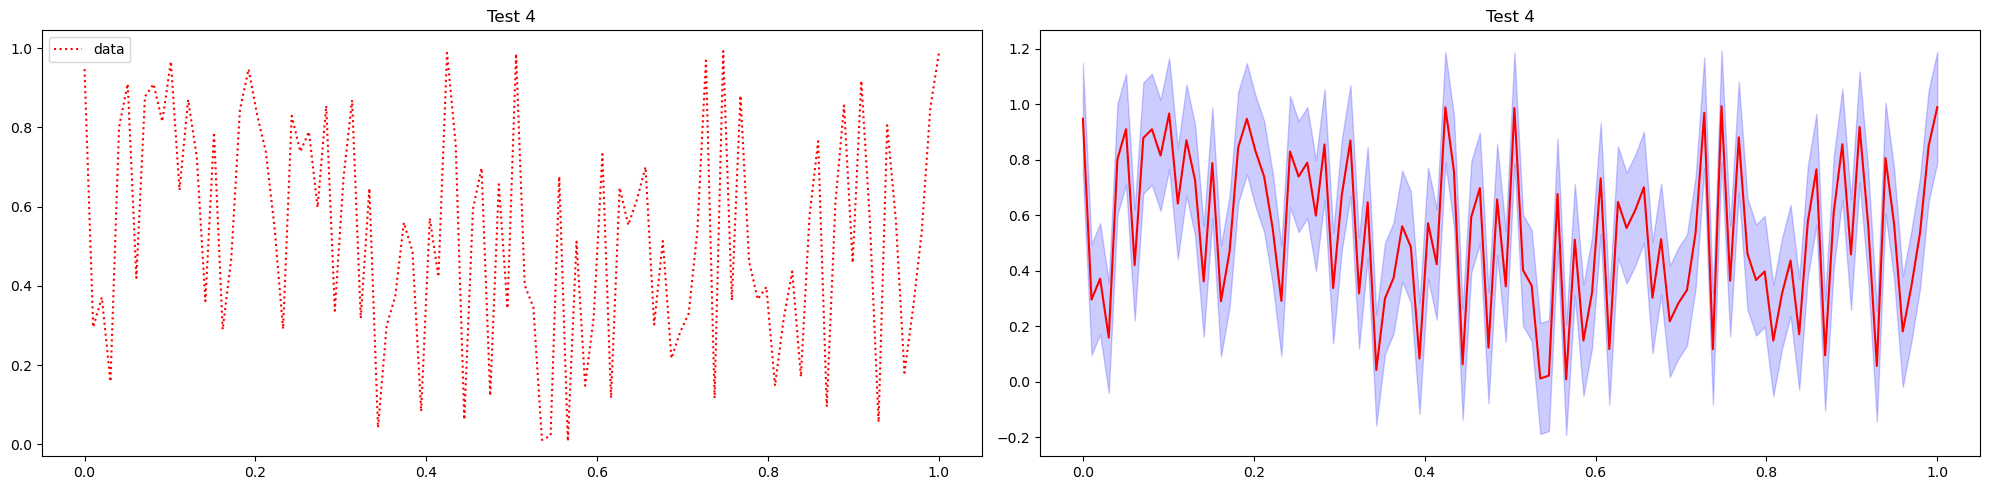

/done


In [1]:
%matplotlib inline
"""
Animation with lines, and an example with confidence intervals.
"""

import numpy as np
import cdxbasics.dynaplot as dynaplot
 
x = np.linspace(0,1,100)

fig = dynaplot.figure(col_size=10)

ax = fig.add_subplot()
ax.set_title("Test")
y = np.random.random(size=(100,))
l = ax.plot(x,y,":",color="red", label="data")[0]
ax.legend()

ax2 = fig.add_subplot()
ax2.set_title("Test Confidence Band")
l2 = ax2.plot(x,y,"-",color="red", label="data")
pm = 0.2
f2 = ax2.fill_between( x, y-pm, y+pm, color="blue", alpha=0.2 )

fig.render()

import time
for i in range(5):
    time.sleep(1)
    y = np.random.random(size=(100,))
    ax.set_title("Test %ld" % i)
    l.set_ydata( y )
    ax2.set_title("Test %ld" % i)
    l2[0].set_ydata( y )
    f2.remove()
    f2 = ax2.fill_between( x, y-pm, y+pm, color="blue", alpha=0.2 )

    fig.render()
fig.close()
print("/done")    

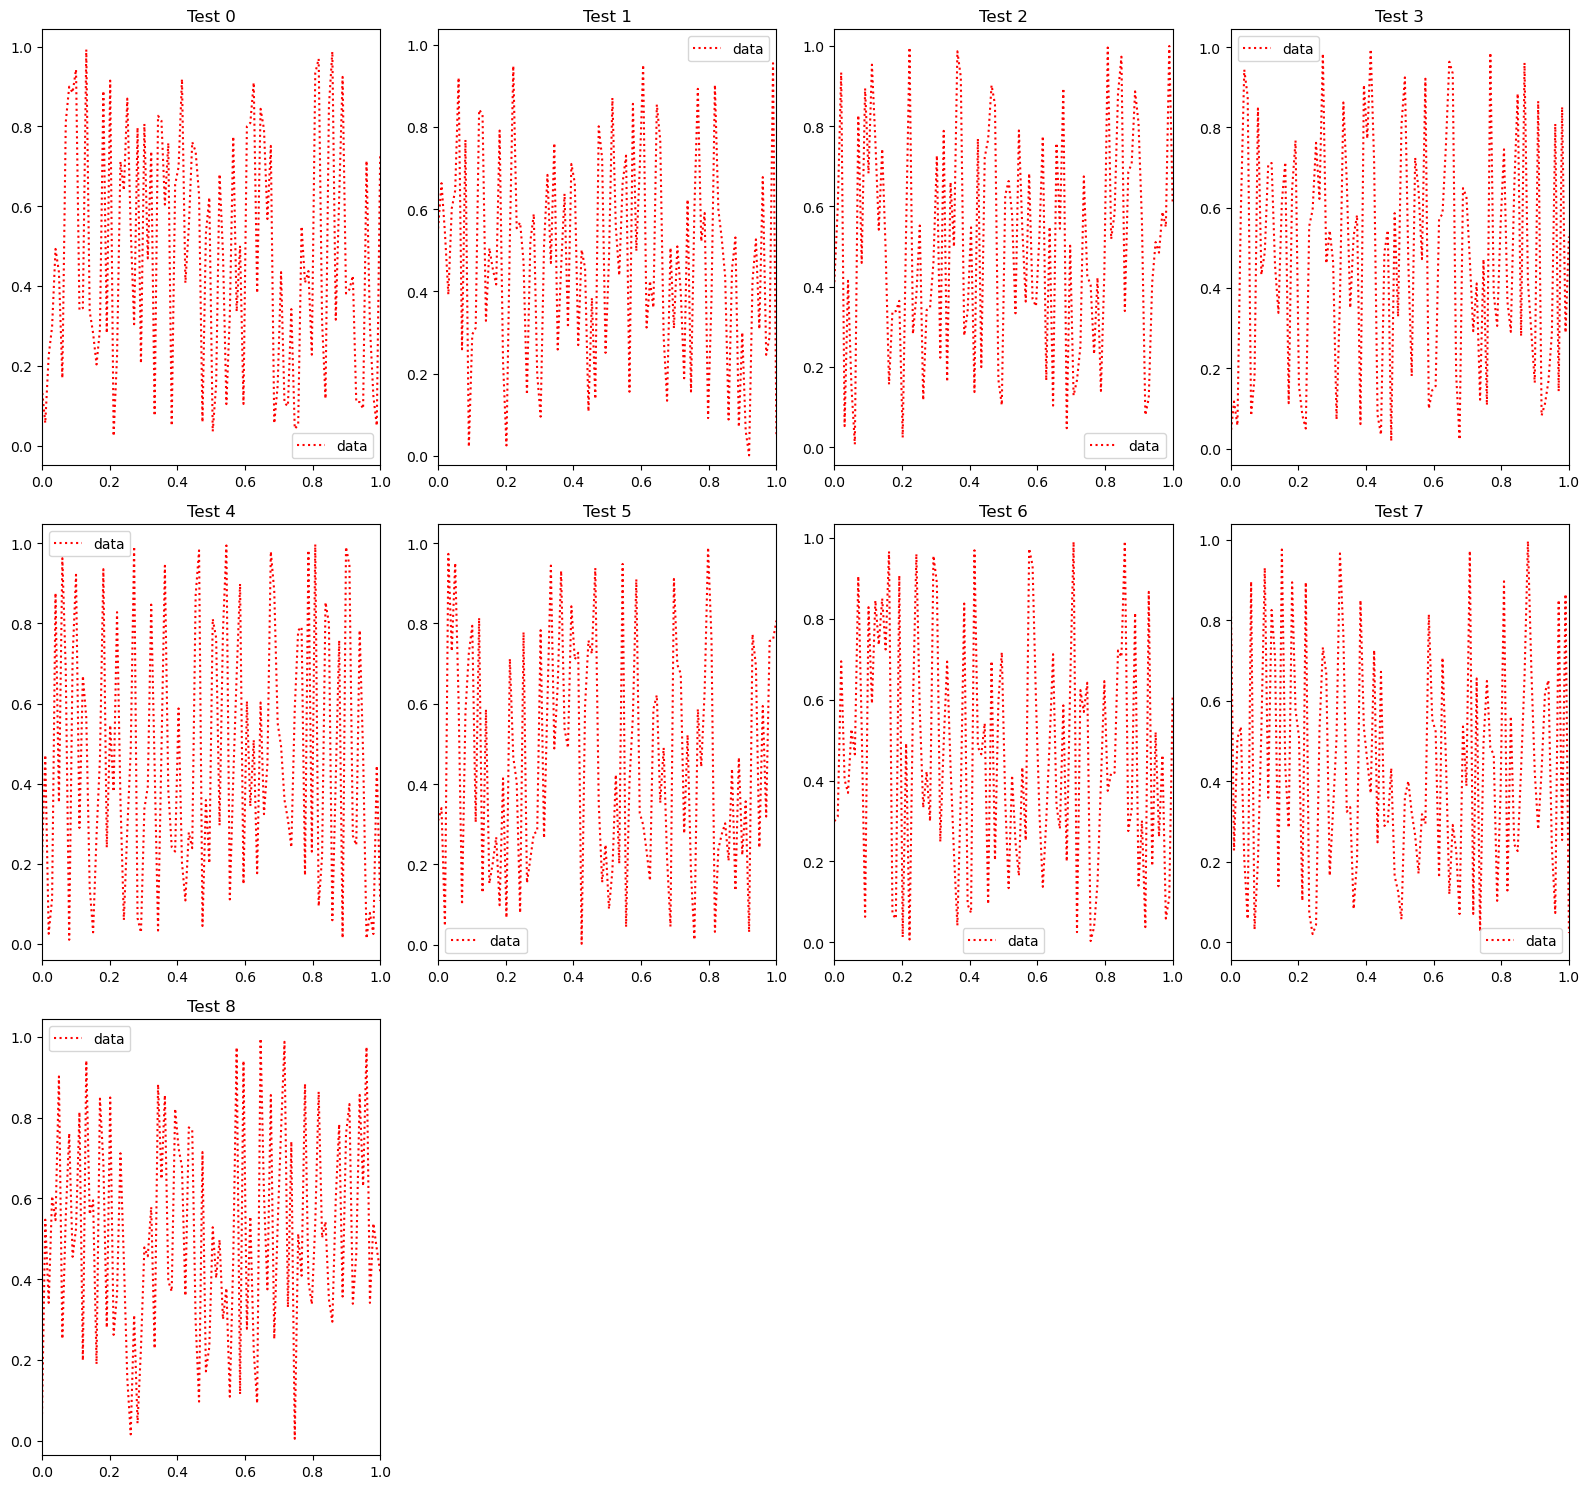

/done


In [2]:
%matplotlib inline
"""
Example of distributing the subplots, incuding the use of "next_row()"
"""

import numpy as np
import cdxbasics.dynaplot as dynaplot
 
x = np.linspace(0,1,100)

fig = dynaplot.figure()
lines = []
for k in range(9):
    if k%4==0:
        fig.next_row()
    ax = fig.add_subplot()
    ax.set_title("Test %ld" % k)
    ax.set_xlim()
    y = np.random.random(size=(100,1))
    l = ax.plot(x,y,":",color="red", label="data")
    lines.append(l)
    ax.legend()

fig.render()

import time
for i in range(5):
    time.sleep(1)
    for l in lines:
        y = np.random.random(size=(100,1))
        l[0].set_ydata( y )
    fig.render()
fig.close()
print("/done")

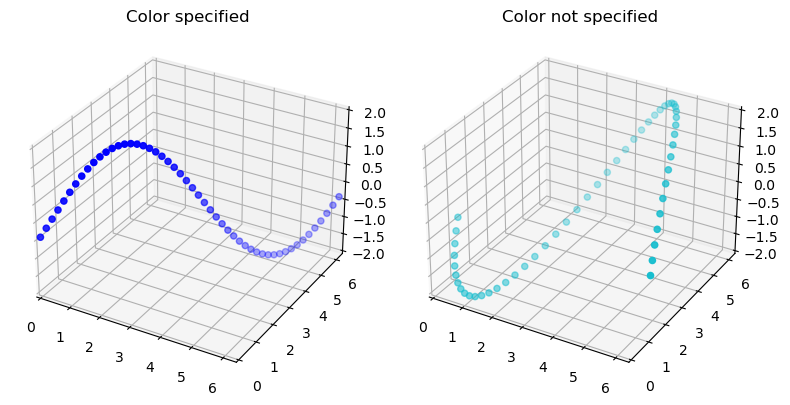

/done


In [3]:
%matplotlib inline
"""
3D graphs
"""

import numpy as np
import cdxbasics.dynaplot as dynaplot
import math
    
x = np.linspace(0.,2.*math.pi,51)
y = x

fig = dynaplot.figure()
ax1  = fig.add_subplot(projection='3d')
ax2  = fig.add_subplot(projection='3d')
ax1.set_xlim(0.,2.*math.pi)
ax1.set_ylim(0.,2.*math.pi)
ax1.set_zlim(-2,+2)
ax1.set_title("Color specified")
ax2.set_xlim(0.,2.*math.pi)
ax2.set_ylim(0.,2.*math.pi)
ax2.set_zlim(-2,+2)
ax2.set_title("Color not specified")
fig.render()
r1 = None
r2 = None
import time
for i in range(50):
    time.sleep(0.01)
    z = np.cos( float(i)/10.+x )+np.sin( float(i)/2.+y )
    if not r1 is None: r1.remove()
    if not r2 is None: r2.remove()
    r1 = ax1.scatter( x,y,z, color="blue" )
    r2 = ax2.scatter( 2.*math.pi-x,math.pi*(1.+np.sin( float(i)/2.+y )),z )
    fig.render()
fig.close()
print("/done")




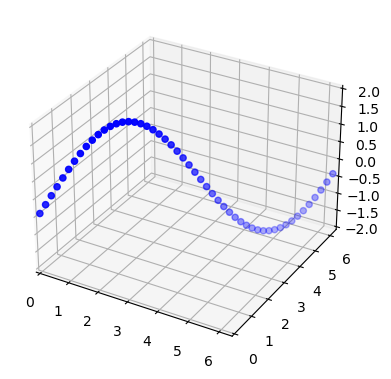

/done


In [4]:
%matplotlib inline
"""
Example with clear() which preserves the color of the animation
I suppose clear() works for all graphs
"""

import numpy as np
import cdxbasics.dynaplot as dynaplot
import math
    
x = np.linspace(0.,2.*math.pi,51)
y = x

fig = dynaplot.figure()
ax  = fig.add_subplot(projection='3d')
ax.set_xlim(0.,2.*math.pi)
ax.set_ylim(0.,2.*math.pi)
ax.set_zlim(-2,+2)
r = None
import time
for i in range(50):
    time.sleep(0.01)
    ax.clear()
    ax.set_xlim(0.,2.*math.pi)
    ax.set_ylim(0.,2.*math.pi)
    ax.set_zlim(-2,+2)
    z = np.cos( float(i)/10.+x )+np.sin( float(i)/2.+y )
    r = ax.scatter( x,y,z, color="blue" )
    fig.render()
fig.close()
print("/done")




Plotting an image with IPython


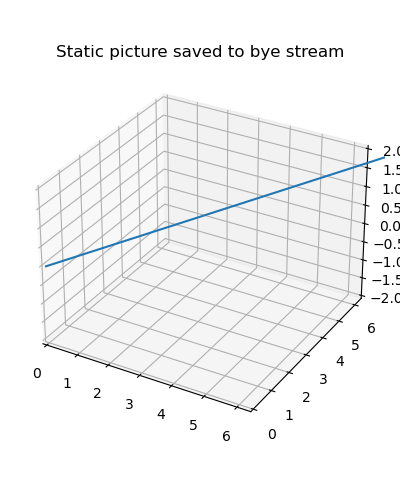

In [7]:
%matplotlib inline
"""
Example which shows how to use DynamicPlot to generate a figure bitmap
"""

import numpy as np
import cdxbasics.dynaplot as dynaplot
import math
from IPython.display import display, Image

x = np.linspace(0.,2.*math.pi,51)
y = x

# generate a figure
fig = dynaplot.figure()
ax  = fig.add_subplot(projection='3d')
ax.set_xlim(0.,2.*math.pi)
ax.set_ylim(0.,2.*math.pi)
ax.set_zlim(-2,+2)
ax.set_title("Static picture saved to bye stream")
ax.plot(x,y*2)
picture_data = fig.to_bytes()
fig.close()

print("Plotting an image with IPython")

im = Image(data=picture_data)
display(im)

